In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
from pandas.plotting import scatter_matrix
# from matplotlib.pyplot import plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn import datasets
from sklearn.ensemble import VotingClassifier
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
iris = datasets.load_iris()
dataset = iris.data

In [3]:
# dataset.shape
dataset = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

In [4]:
# dataset.describe()
dataset.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
dataset.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
print(dataset.groupby('species').size())

species
0    50
1    50
2    50
dtype: int64


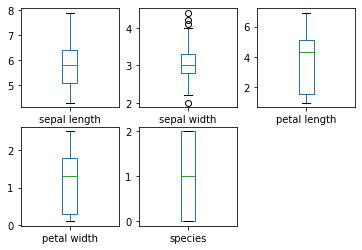

In [7]:
# univariate plots - boz and whisker plots
dataset.plot(kind = 'box', subplots = True , layout = (2,3),sharex = False, sharey = False)
plt.show()

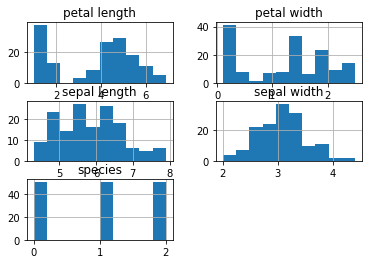

In [8]:
# histogram of the variable
dataset.hist()
plt.show()

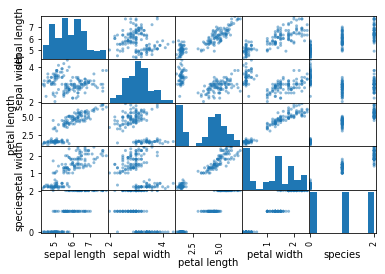

In [9]:
# multivariate plots
scatter_matrix(dataset)
plt.show()

K fold cross validation:

Dataset is split into k sets and one of the set is used as cross validation set, remaining k-1 sets are used as training set.
Similarly all this process id followed for all k sets

In [46]:
dataset

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [47]:
# Creating a validation dataset
X = dataset.iloc[:,0:4]
y = dataset['species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [49]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Logistic Regression
Linear Discriminant Analysis
K-Nearest neighbors
Classification and Regression Tree
Gaussian Naive Bayes
Support Vector Machine

In [50]:
# Building models
models = []
models.append(('LR',LogisticRegression(solver = 'liblinear',multi_class = 'ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma = 'auto')))

In [57]:
# evaluate the models
results = []
names = []
for name,model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
#     print(cv_results)
    results.append(cv_results)
    names.append(name)
    print("{0:s} {1:f} {2:f}".format(name,cv_results.mean(),cv_results.std()))
    
print(results)
    


LR 0.950000 0.055277
LDA 0.975000 0.038188
KNN 0.958333 0.041667
NB 0.950000 0.055277
SVM 0.983333 0.033333
[array([1.        , 0.83333333, 0.91666667, 0.91666667, 1.        ,
       0.91666667, 1.        , 1.        , 1.        , 0.91666667]), array([1.        , 1.        , 1.        , 0.91666667, 1.        ,
       0.91666667, 1.        , 1.        , 1.        , 0.91666667]), array([1.        , 0.91666667, 1.        , 0.91666667, 1.        ,
       0.91666667, 1.        , 1.        , 0.91666667, 0.91666667]), array([1.        , 0.91666667, 1.        , 0.91666667, 1.        ,
       0.83333333, 1.        , 1.        , 0.91666667, 0.91666667]), array([1.        , 1.        , 1.        , 0.91666667, 1.        ,
       0.91666667, 1.        , 1.        , 1.        , 1.        ])]


In [52]:
model = SVC(gamma = 'auto')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(predictions)
print(y_test)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]
14     0
98     1
75     1
16     0
131    2
56     1
141    2
44     0
29     0
120    2
94     1
5      0
102    2
51     1
78     1
42     0
92     1
66     1
31     0
35     0
90     1
84     1
77     1
40     0
125    2
99     1
33     0
19     0
73     1
146    2
Name: species, dtype: int64


In [58]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

